In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
visa_df=pd.read_csv(r"C:\Users\dasar\Documents\Data Science\Naresh IT\Data sets\Visadataset.csv")
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


**Bi variate analysis**
- Analyse the two variables
- Two categorical columns
- Two numerical columns
- one categorical and one numerical

**CAtegorical vs Categorical**

In [3]:
visa_df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [4]:
cat=visa_df.select_dtypes(include="object").columns
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [5]:
num_cols=visa_df.select_dtypes(exclude="object").columns
num_cols

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**COntinent-case_status**

In [6]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

**How many Asia people got the visa certified**
**How many Asia people got VISA denied**

In [7]:
len(visa_df[(visa_df['continent']=='Asia') & (visa_df['case_status']=='Certified')])

11012

In [8]:
len(visa_df[(visa_df['continent']=='Asia') & (visa_df['case_status']=='Denied')])

5849

In [9]:
Certified=[]
Denied=[]
unique_values = visa_df['continent'].unique()
for i in unique_values:
    count_Cert = len(visa_df[(visa_df['continent'] == i) & (visa_df['case_status'] == 'Certified')])
    count_Den = len(visa_df[(visa_df['continent'] == i) & (visa_df['case_status'] == 'Denied')])
    Certified.append(count_Cert)
    Denied.append(count_Den)
data = {
    'Certified': Certified,
    'Denied': Denied
}

result_df = pd.DataFrame(data,index=unique_values)
print(result_df)

               Certified  Denied
Asia               11012    5849
Africa               397     154
North America       2037    1255
Europe              2957     775
South America        493     359
Oceania              122      70


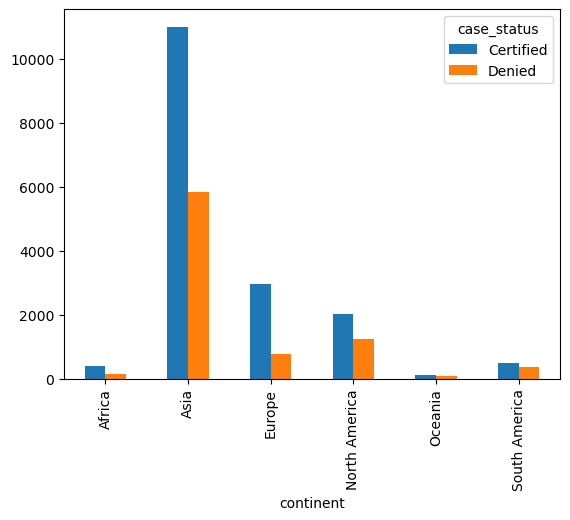

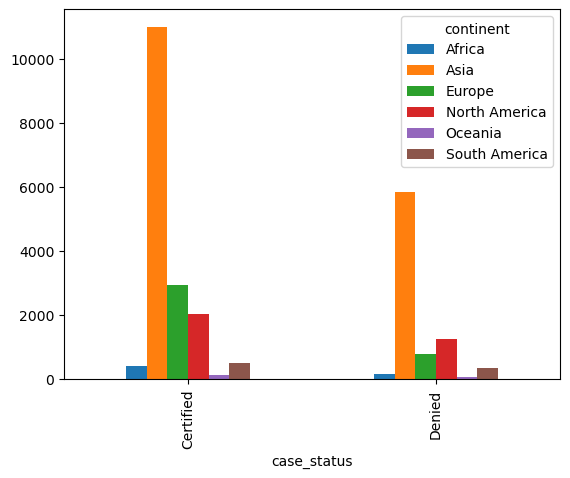

In [10]:
result1=pd.crosstab(visa_df['continent'],visa_df['case_status'])
result1.plot(kind='bar')
plt.show()
result1=pd.crosstab(visa_df['case_status'],visa_df['continent'])
result1.plot(kind='bar')
plt.show()

<Axes: xlabel='continent,education_of_employee'>

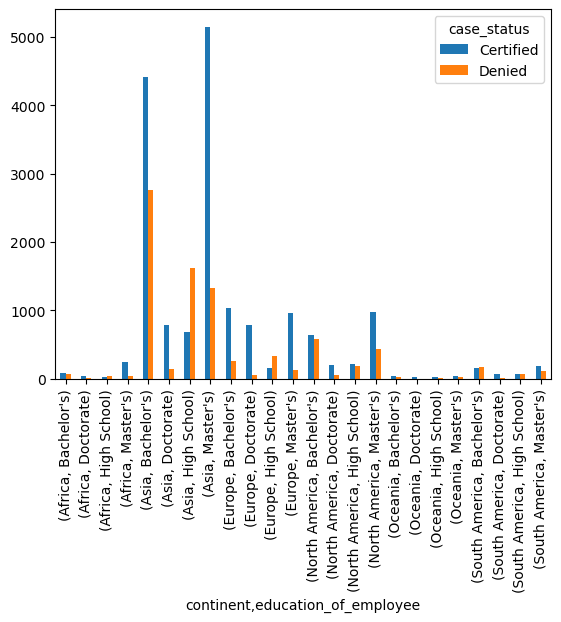

In [11]:
col1=visa_df['continent']
col2=visa_df['education_of_employee']
col3=visa_df['case_status']
col=[col1,col2]
res=pd.crosstab(col,col3)
res.plot(kind='bar')


<Axes: xlabel='case_status'>

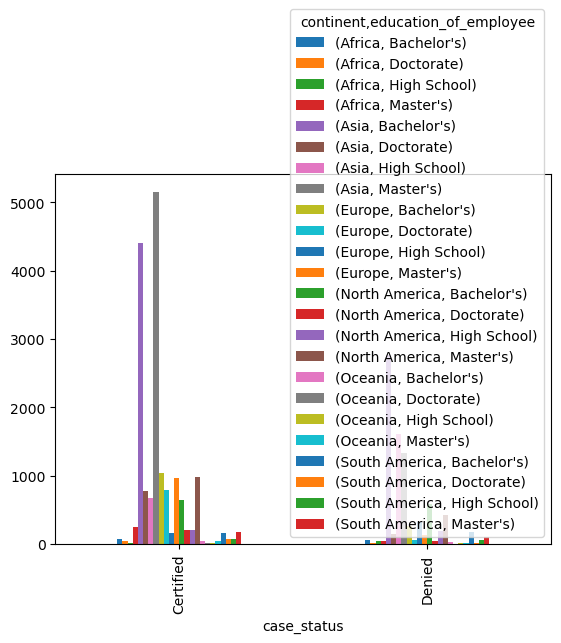

In [12]:
col1=visa_df['continent']
col2=visa_df['education_of_employee']
col3=visa_df['case_status']
col=[col1,col2]
re=pd.crosstab(col3,col)
re.plot(kind='bar')

**Numerical-Numerical**

- In order to plot numerical vs numerical we need to use scatter plots
- Scatter plots will give the relation between two numerical columns
- it's under matplotlib

plt.scatter

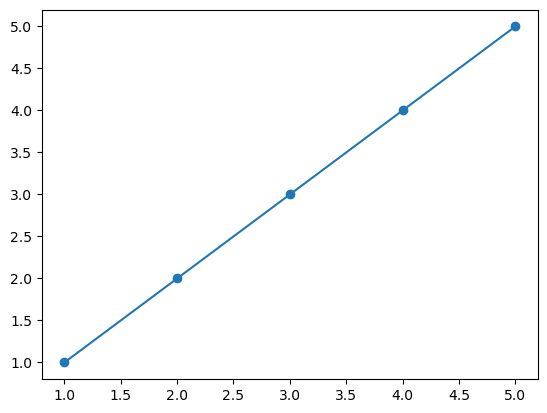

In [13]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

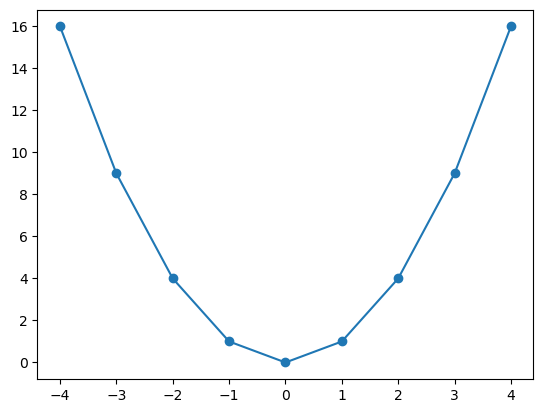

In [14]:
x=[i for i in range(-4,5)]
y=[i*i for i in x]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

**Scatter plot -1**
- no_of_employess and yr_of estab

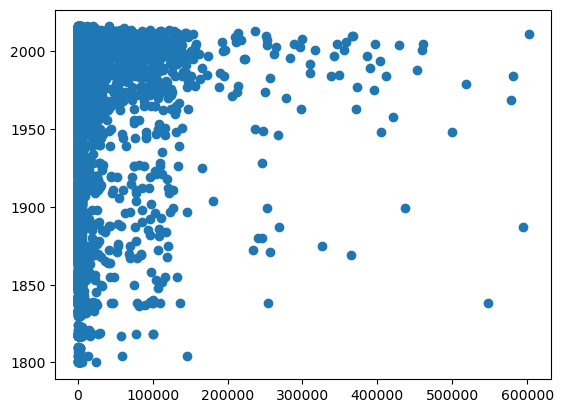

In [15]:
plt.scatter(visa_df['no_of_employees'],visa_df['yr_of_estab'])

**Observation**-No Relation

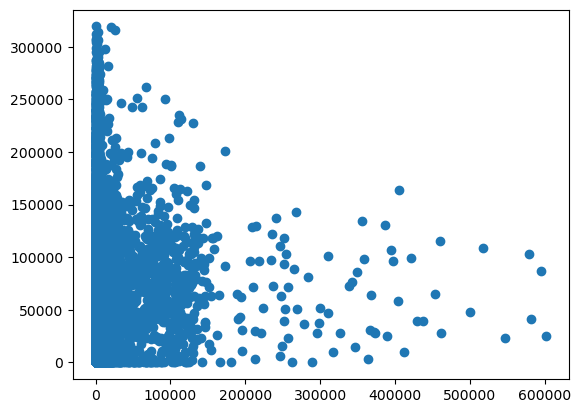

In [16]:
    plt.scatter(visa_df['no_of_employees'],visa_df['prevailing_wage'])

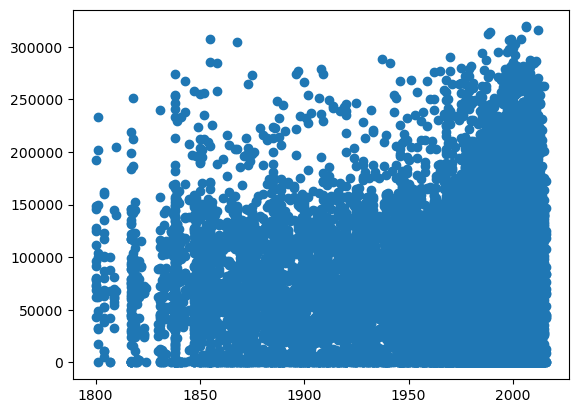

In [17]:
plt.scatter(visa_df['yr_of_estab'],visa_df['prevailing_wage'])

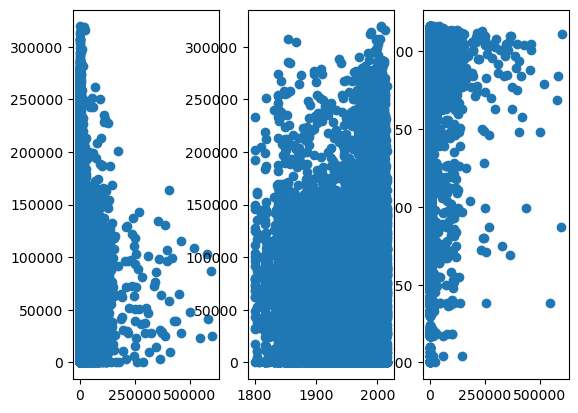

In [18]:
plt.subplot(1,3,3)
plt.scatter(visa_df['no_of_employees'],visa_df['yr_of_estab'])
plt.subplot(1,3,1)
plt.scatter(visa_df['no_of_employees'],visa_df['prevailing_wage'])
plt.subplot(1,3,2)
plt.scatter(visa_df['yr_of_estab'],visa_df['prevailing_wage'])

**Correlation-Coefficient**

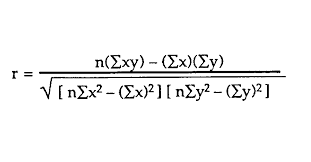

- Pearson correlation coefficient will give the amount of relation between variables
- Denoted with r
- r varies from -1 to 1
- For positive relation r varies from 0 to 1
- For negative relation r varies from -1 to 0
- For no relation r approximate 0
- In python code we have **corr** function under pandas
    - This will give covariance matrix
    - In this data we have 3 numerical columns
    - so we will get 3*3 9 values
    - All trace of the matrix represents variance
    - Upper triangle and lower triangle represents co variance

In [19]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


**Observations**
- The correlation value between no_of_employees and yr_of_estb approximately zero
    - Which indicates no relation
- The correlation value between no_of_employees and prevailing_wage approximately zero
    - Which indicates no relation
- The correlation value between prevailing_wage and yr_of_estb approximately zero
    - Which indicates no relation

**What will happen if the correlation is high**
- for that we will read wine quality datatset
- will perform the corr

In [20]:
import pandas as pd

winequality = pd.read_csv(r"C:\Users\dasar\Documents\Data Science\Naresh IT\Data sets\winequality_red.csv", encoding='cp1252')
wine_data=winequality.drop_duplicates()
wine_data=wine_data.iloc[1:].reset_index(drop=True)

In [21]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [22]:
len(wine_data.columns)

12

In [23]:
wine_corr=wine_data.corr()

**Heatmap**

- heat map will provide the matrix representation of correlation value
- heat map represents values in colour format
- different different values in different colour
- beside matrix it will display colour bar
- colour bar means like a scale of values with colour
- It is under seaborn package

<Axes: >

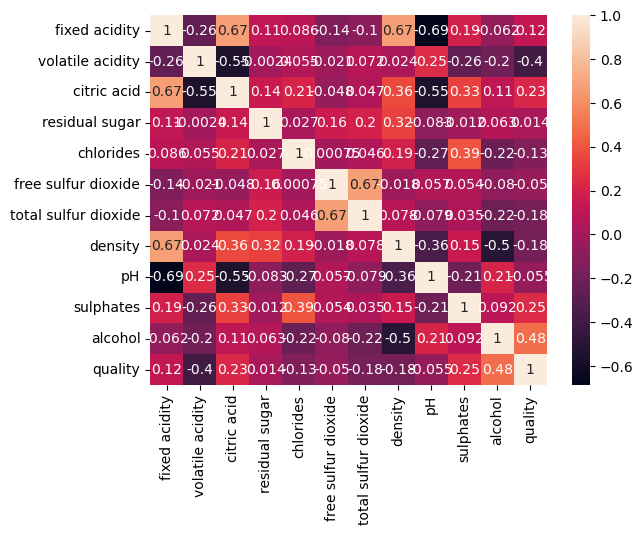

In [24]:

sns.heatmap(wine_corr,annot=True)

<Axes: >

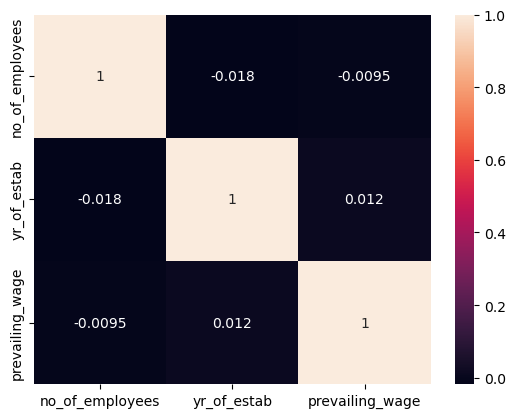

In [26]:
visa_corr=visa_df.corr(numeric_only=True)
sns.heatmap(visa_corr,annot=True)

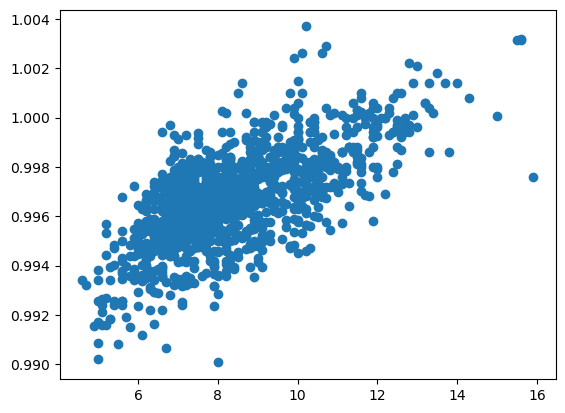

In [27]:
plt.scatter(wine_data['fixed acidity'],wine_data['density'])

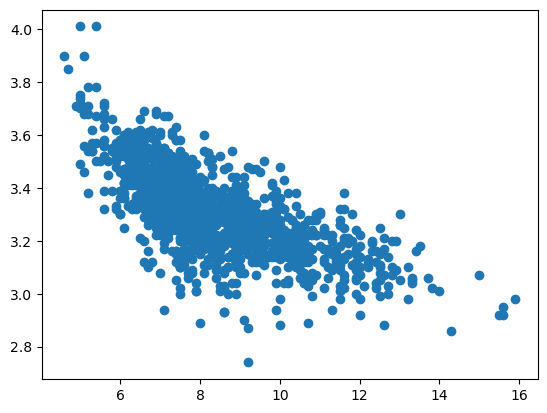

In [30]:
plt.scatter(wine_data['fixed acidity'],wine_data['pH'])

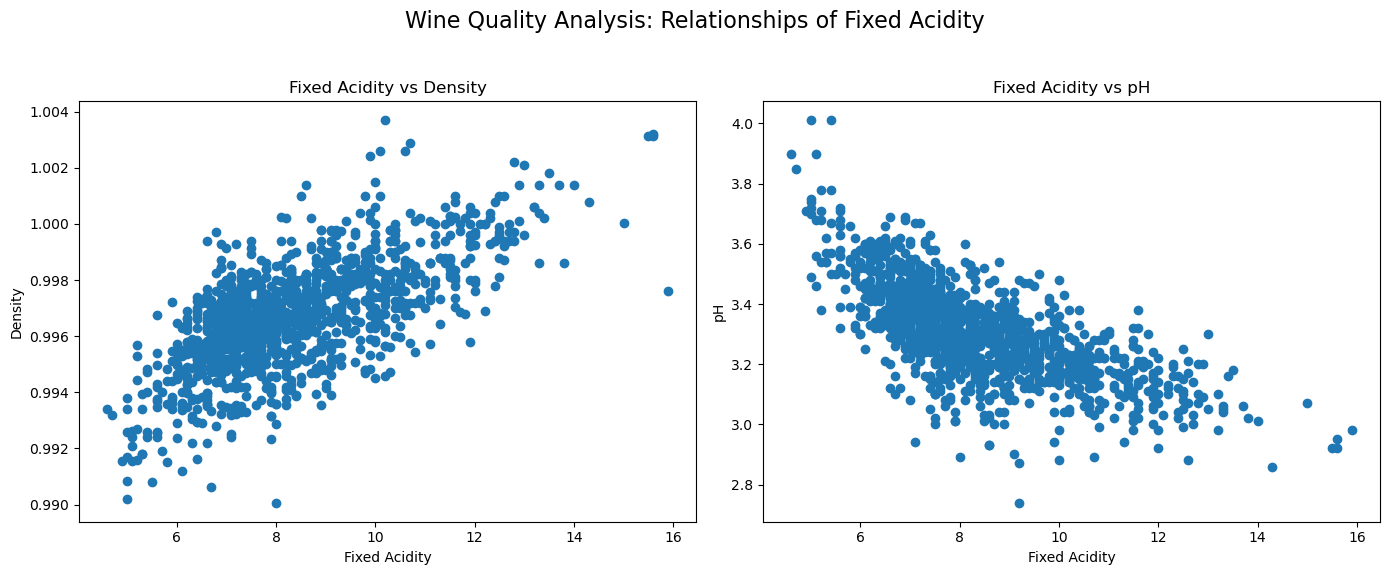

In [32]:
plt.figure(figsize=(14, 6))

# First subplot
plt.subplot(1, 2, 1)
plt.scatter(wine_data['fixed acidity'], wine_data['density'])
plt.title('Fixed Acidity vs Density')
plt.xlabel('Fixed Acidity')
plt.ylabel('Density')

# Second subplot
plt.subplot(1, 2, 2)
plt.scatter(wine_data['fixed acidity'], wine_data['pH'])
plt.title('Fixed Acidity vs pH')
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')

# Add a main title for the figure
plt.suptitle('Wine Quality Analysis: Relationships of Fixed Acidity', fontsize=16)

# Show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()